#Content
<ol>
    <ol>
      <li>Import the libraries, 
      <li>load dataset
      <li>print shape of data
      <li>checking the proportion of each class
      <li>Plot the images from each class and print their corresponding labels
        <ol>
          <li>random images
          <li>mean images groupped by labels
    </ol>
  </li> 
</ol>



6. Data Pre-processing:
<ol> 
  <li>Remove unwanted noise from the images using Guassian Blurring
  <li> Normalization.

</ol>

7. Plot the images after the pre-processing steps ( Blurring & Normalization )
8. Split the data into train and test
9. Make data compatible
<ol>
<li>Convert labels from digits to one hot vector
<li>Check the shape of the data
</ol>
10. Building CNN
<ol>
<li>Model_1: create the model
<li>Model_2: Build another model to implement improvements Model Performance Improvement
<li>Model_3: hidden layer feature map had been duplicated
<li>Model_4: fully connected layer with 512 neuron, deleted batch normalization and with 20 epocs
</ol>
11. Model Performance Improvement
12. Model Performance Evaluation
13. Conclusion and key takeaways




#Import the libraries

In [110]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import Adam #optimiers for optimizing the model
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers, layers

#load dataset

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd

img_array = np.load('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/images.npy')
img_arr_origi=img_array

labels=pd.DataFrame(pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/Labels.csv'))


#print shape of data

In [113]:
img_array.shape

(4750, 128, 128, 3)



*   4750 image in the dataeset
*   image size 128x128
*   image chanel 3



In [114]:
labels.shape

(4750, 1)

* 4750 labels are in the dataset

# checking the proportion of each class

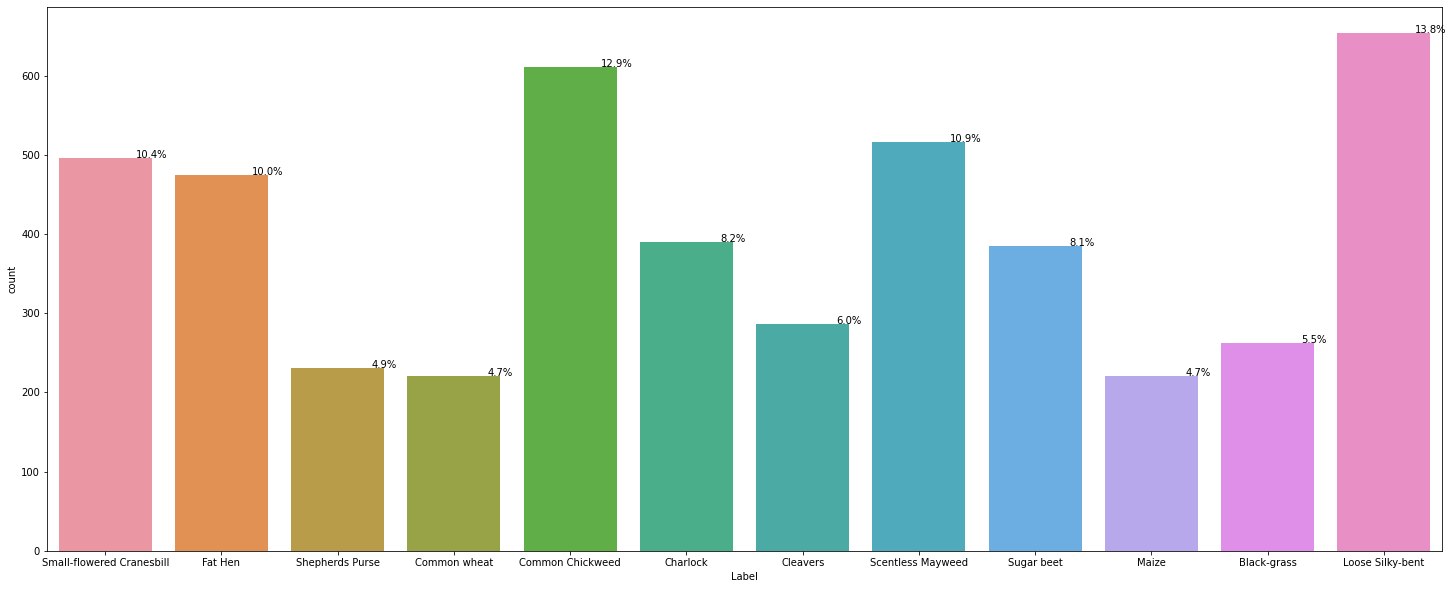

In [115]:
plt.figure(figsize=(25,10))
ax=sns.countplot(data=labels, x=labels['Label'])
total = float(len(labels))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

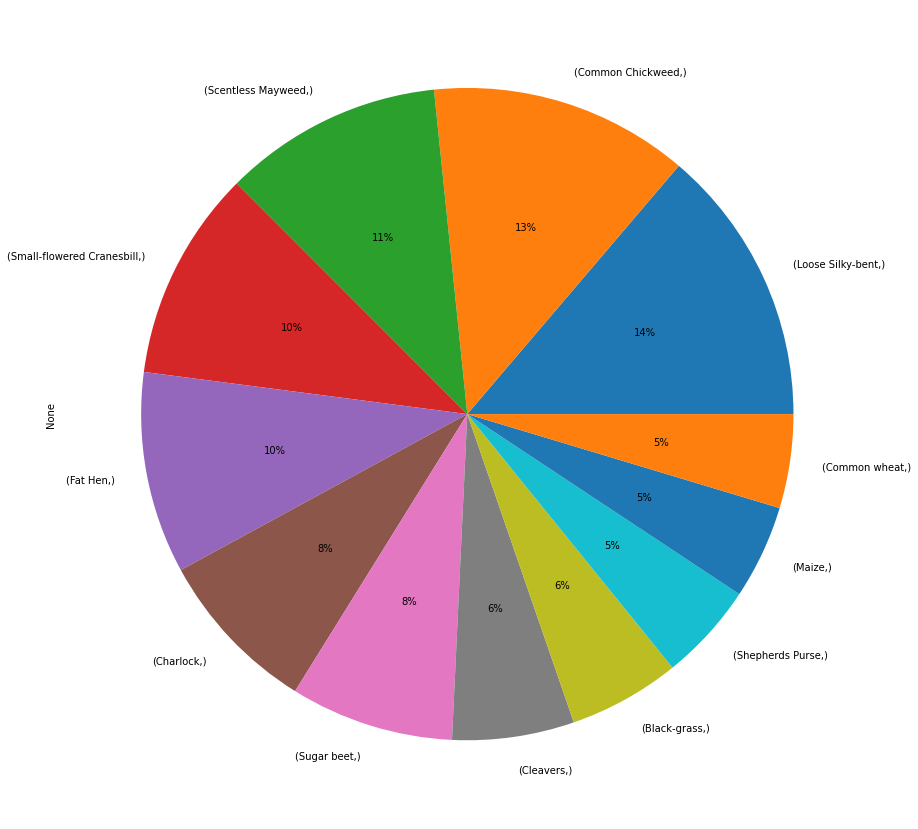

In [116]:
plt.figure(figsize=(15,15))

labels.value_counts().plot(kind='pie', autopct='%1.0f%%')

The dataset is **imbalanced** 5 plnt seeds are above 10% and 7 under and **the most common seed has a 14% proportion** while there are 3 where the poportion is approx. equal 5% 

In [117]:
df_0=pd.DataFrame(labels)

In [118]:
df_0.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

#Plot the images from each class and print their corresponding labels

*show 25 pictures randomly with their labels in a 5x5 matrix*

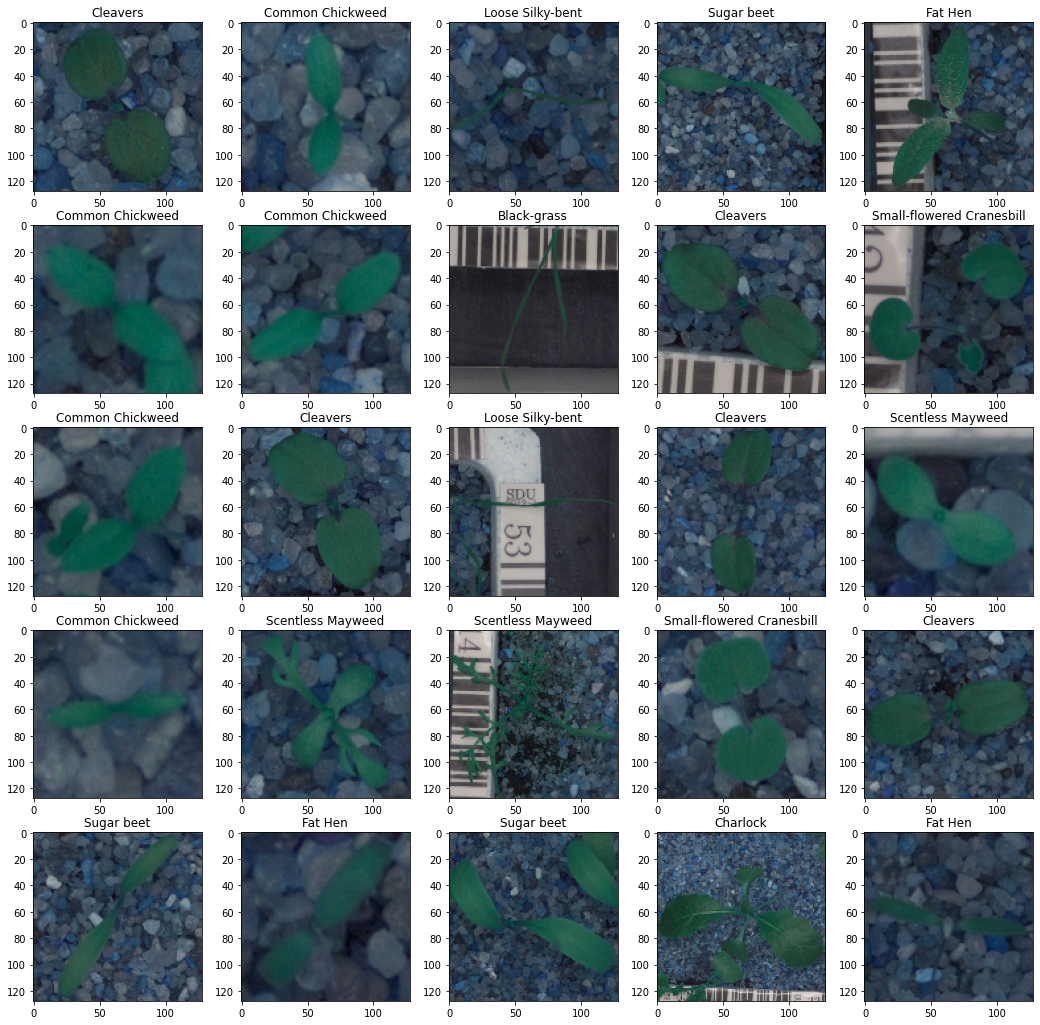

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import random

w = 10
h = 10
fig = plt.figure(figsize=(18, 18))
columns = 5
rows = 5

n=random.sample(range(len(img_array)), columns*rows)
for i in range(1, columns*rows +1):
    img = img_array[n[i-1]]
    lbl= labels.iloc[n[i-1]][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title(lbl)
plt.show()

#finding the mean image to all seeds

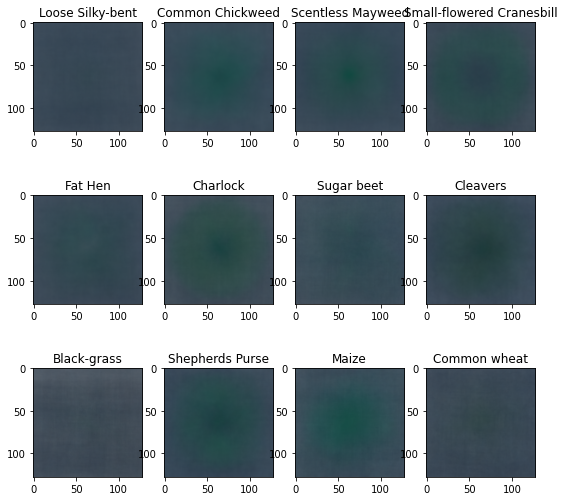

In [124]:
lst=(['Loose Silky-bent', 'Common Chickweed', 'Scentless Mayweed','Small-flowered Cranesbill','Fat Hen','Charlock','Sugar beet','Cleavers','Black-grass','Shepherds Purse','Maize','Common wheat'])
fig = plt.figure(figsize=(9, 9))
rows=3
columns=4

for i in range(0, len(lst)):
  df=df_0[df_0['Label']==lst[i]]
  df_val=df.index.values
  arr_mean=np.mean(img_array[df_val]/255, axis=0)
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(arr_mean)
  plt.title(lst[i])
  # print(arr_mean)
  

#Data Pre - Processing

##Remove unwanted noise from the images using Guassian Blurring
*check it with printing example images*

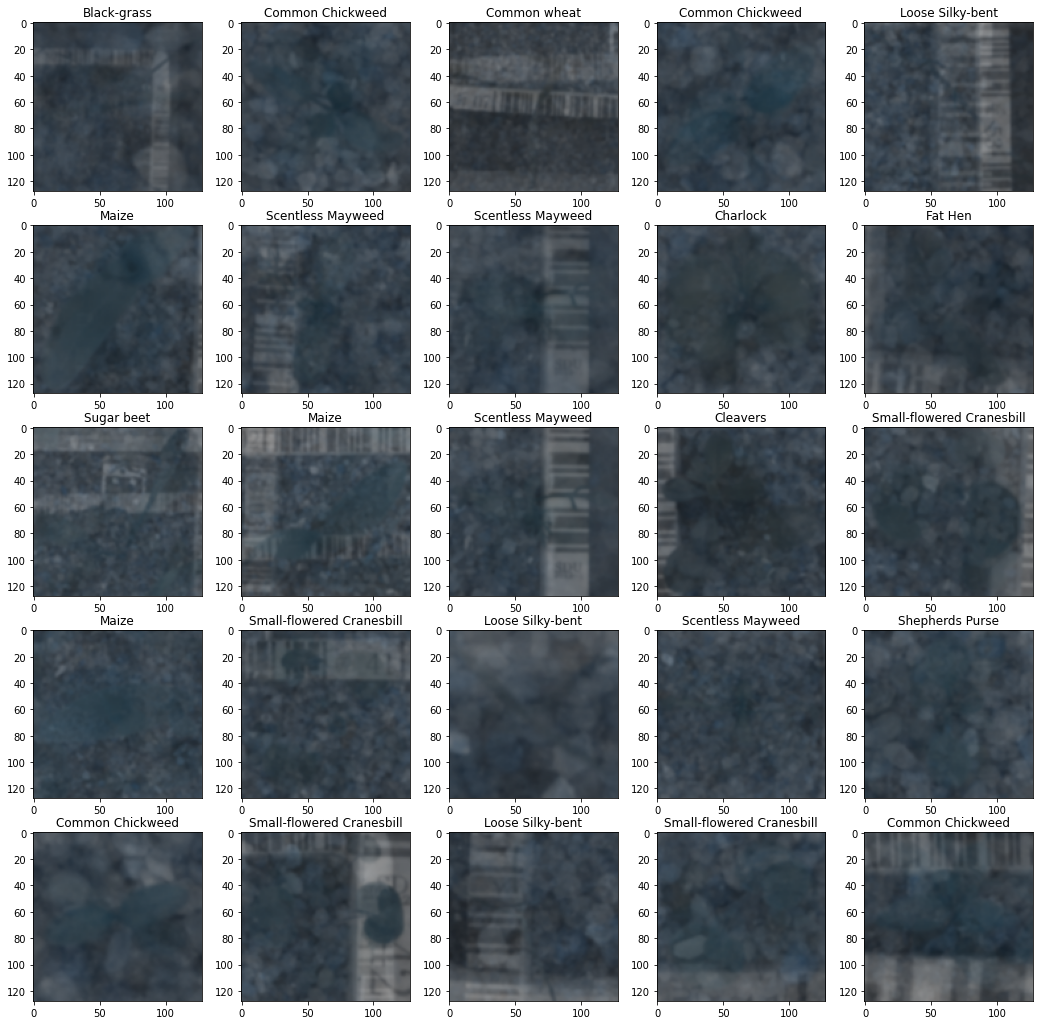

In [41]:
from scipy.ndimage.filters import gaussian_filter
img_array = gaussian_filter(img_array, sigma=1)

w = 10
h = 10
fig = plt.figure(figsize=(18, 18))
columns = 5
rows = 5

n=random.sample(range(len(img_array)), columns*rows)
for i in range(1, columns*rows +1):
    img = img_array[n[i-1]]
    lbl= labels.iloc[n[i-1]][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(lbl)
plt.show()


##Apply the normalization

In [42]:
img_array=img_array/255

In [43]:
img_array.shape

(4750, 128, 128, 3)

In [44]:
labels.shape

(4750, 1)

#Plot the images after the pre-processing steps ( Blurring & Normalization )

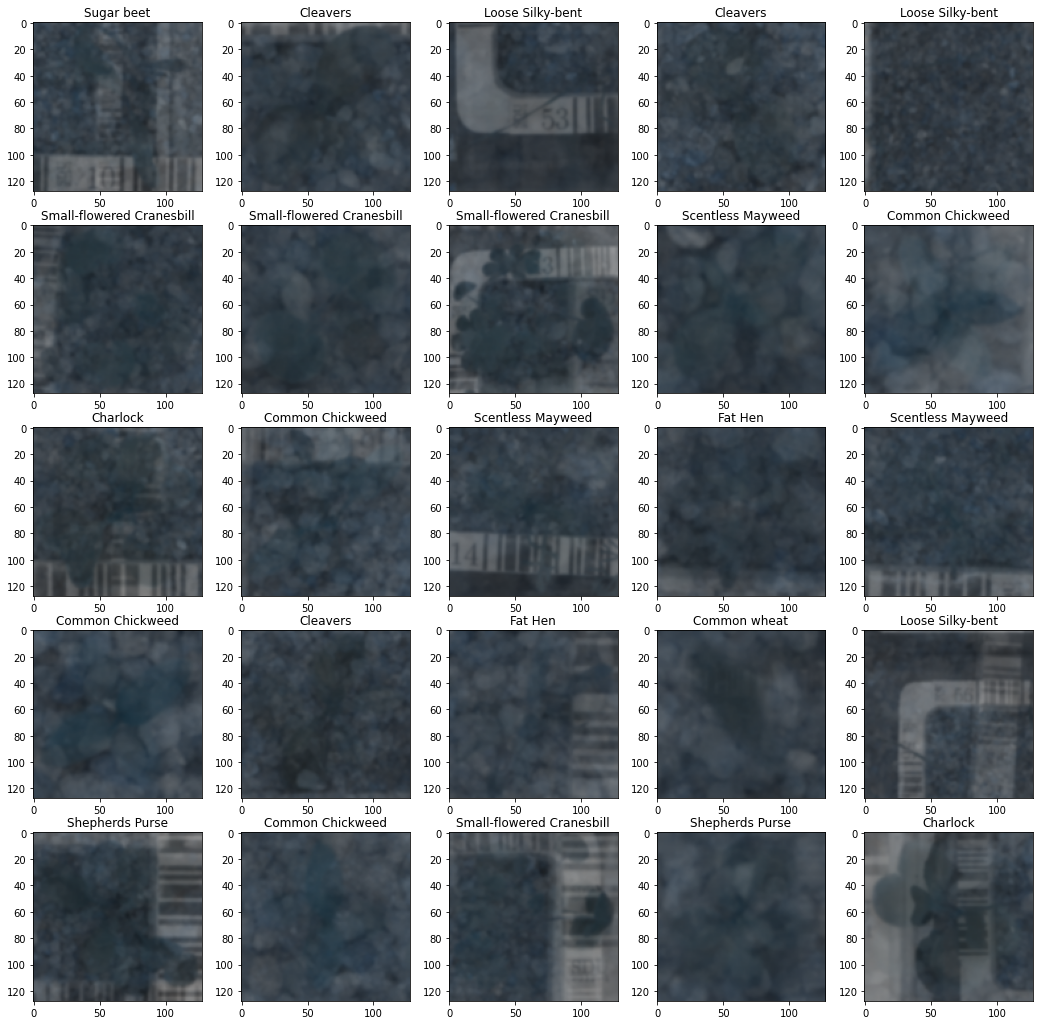

In [45]:
w = 10
h = 10
fig = plt.figure(figsize=(18, 18))
columns = 5
rows = 5

n=random.sample(range(len(img_array)), columns*rows)
for i in range(1, columns*rows +1):
    img = img_array[n[i-1]]
    lbl= labels.iloc[n[i-1]][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(lbl)
plt.show()

#Split the data into train and test
<i> data a little bit imbalanced so I use stratify function for plitting the dataset

In [46]:
X=img_array
X.shape

(4750, 128, 128, 3)

In [47]:
y=labels
y.shape

(4750, 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [49]:
X_train.shape

(3325, 128, 128, 3)

In [50]:
X_test.shape

(1425, 128, 128, 3)

In [51]:
y_test.shape

(1425, 1)

In [52]:
y_train.shape

(3325, 1)

#Make data compatible

In [53]:
y_test

,Label
3326,Sugar beet
3894,Black-grass
3322,Sugar beet
4036,Black-grass
4424,Loose Silky-bent
...,...
3732,Maize
2559,Cleavers
4348,Loose Silky-bent
3031,Scentless Mayweed


#Convert labels from digits to one hot vector

*convert y_train in one hot vector*

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import array

y_train_e=y_train


# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train_e)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_train_e=onehot_encoded

In [57]:
y_train_e[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

*convert y_test in one hot vector*

In [58]:
y_test_e=y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test_e)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
y_test_e=onehot_encoded

In [60]:
y_test_e[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

#Check the shape of the data

In [64]:
y_train_e.shape

(3325, 12)

In [65]:
y_test.shape

(1425, 1)

In [63]:
X_test.shape

(1425, 128, 128, 3)

In [62]:
y_test_e.shape

(1425, 12)

**RESHAPE is not neccessary I will use with the current shape the model**

#Building CNN

##define layers

In [67]:
''' Compile model (using the efficient Adam gradient descent optimization algorithm
    with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.)'''
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Model_1: create the model

1.   Input convolution layer  32 feature maps size of 5×5 and a relu activation function. 
2. Batch Normalization Layer. 
3. Max Pool layer with size 2×2.default value is the pool size (2x2) Dropout layer at 25%
4. Activation 'relu' is the most populat activation function
5.   Downsizing with MaxPooling that helps to reduce computational cost
6.   Dropout genaralization will be imporved used on fully connected layers and mypooling
7.   Dense activate the operation
8.   Softmax activation kind of sigmoid function used for multiclassification**


In [68]:
# Set the CNN model

batch_size = None

model = Sequential()

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:])) # X_train.shape[1:]
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

In [69]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [70]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
batch_size = 32
num_classes = 12
epochs = 40
num_predictions = 20

In [ ]:
history = model.fit(X_train,
                    y_train_e,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_e),
                    shuffle=True,
                    verbose=1)
                  

Epoch 1/40
104/104 [==============================] - 244s 2s/step - loss: 2.2140 - accuracy: 0.2304 - val_loss: 2.5127 - val_accuracy: 0.0463
Epoch 2/40
104/104 [==============================] - 243s 2s/step - loss: 1.8568 - accuracy: 0.3356 - val_loss: 2.5793 - val_accuracy: 0.0519
Epoch 3/40
104/104 [==============================] - 240s 2s/step - loss: 1.5071 - accuracy: 0.4620 - val_loss: 2.3328 - val_accuracy: 0.2175
Epoch 4/40
104/104 [==============================] - 242s 2s/step - loss: 1.3214 - accuracy: 0.5335 - val_loss: 3.4108 - val_accuracy: 0.0954
Epoch 5/40
104/104 [==============================] - 239s 2s/step - loss: 1.1788 - accuracy: 0.5726 - val_loss: 2.3223 - val_accuracy: 0.1312
Epoch 6/40
104/104 [==============================] - 241s 2s/step - loss: 1.1069 - accuracy: 0.5985 - val_loss: 1.9799 - val_accuracy: 0.3221
Epoch 7/40
104/104 [==============================] - 240s 2s/step - loss: 1.0463 - accuracy: 0.6159 - val_loss: 1.4713 - val_accuracy: 0.6035

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test_e, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 22s 478ms/step - loss: 8.8140 - accuracy: 0.1916
Test loss: 8.813966751098633
Test accuracy: 0.1915789544582367


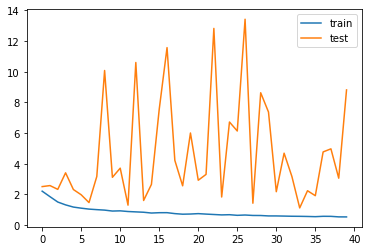

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

accuracy of the model with 40 epochs pearhapt the number of epochs is to much and without callbacks tunings the model performance is very bad

#Model_2: Build another model to implement improvements Model Performance Improvement
*callllbacks:*

1.   early stopping: training will be stopped if it wont improve
2.   model checkpoint: save the weights and model in a checkpoint file
3.   reduce epochs



In [75]:
# Set the CNN model

batch_size = None

model = Sequential()

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)       

In [76]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [77]:
batch_size = 32
num_classes = 12
epochs = 10
num_predictions = 20

In [78]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [79]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [80]:
history = model.fit(X_train,
                    y_train_e,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_e),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/10
104/104 [==============================] - 244s 2s/step - loss: 3.2820 - accuracy: 0.1789 - val_loss: 2.5195 - val_accuracy: 0.1375

Epoch 00001: val_loss improved from inf to 2.51950, saving model to cifar_cnn_checkpoint_01_loss2.5195.h5
Epoch 2/10
104/104 [==============================] - 235s 2s/step - loss: 1.9387 - accuracy: 0.3005 - val_loss: 2.7218 - val_accuracy: 0.1004

Epoch 00002: val_loss did not improve from 2.51950
Epoch 3/10
104/104 [==============================] - 239s 2s/step - loss: 1.6122 - accuracy: 0.4090 - val_loss: 3.0946 - val_accuracy: 0.1375

Epoch 00003: val_loss did not improve from 2.51950
Epoch 4/10
104/104 [==============================] - 238s 2s/step - loss: 1.4480 - accuracy: 0.4689 - val_loss: 2.6889 - val_accuracy: 0.1474

Epoch 00004: val_loss did not improve from 2.51950
Epoch 5/10
104/104 [==============================] - 240s 2s/step - loss: 1.2893 - accuracy: 0.5155 - val_loss: 4.2217 - val_accuracy: 0.1453

Epoch 00005: val_loss

In [81]:
# Score trained model.
scores = model.evaluate(X_test, y_test_e, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 22s 488ms/step - loss: 2.3759 - accuracy: 0.2014
Test loss: 2.3758766651153564
Test accuracy: 0.20140351355075836


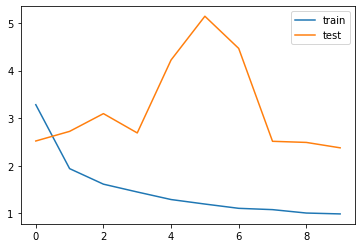

In [82]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#Model_3: hidden layer feature map had been duplicated

In [83]:
# Set the CNN model

batch_size = None

model = Sequential()

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 128)       102528    
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 128)      

In [85]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [86]:
batch_size = 32
num_classes = 12
epochs = 10
num_predictions = 20

In [87]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [88]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [89]:
history = model.fit(X_train,
                    y_train_e,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_e),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/10
104/104 [==============================] - 394s 4s/step - loss: 3.1105 - accuracy: 0.1618 - val_loss: 2.4868 - val_accuracy: 0.1375

Epoch 00001: val_loss improved from inf to 2.48683, saving model to cifar_cnn_checkpoint_01_loss2.4868.h5
Epoch 2/10
104/104 [==============================] - 400s 4s/step - loss: 2.0471 - accuracy: 0.2605 - val_loss: 2.8932 - val_accuracy: 0.1375

Epoch 00002: val_loss did not improve from 2.48683
Epoch 3/10
104/104 [==============================] - 406s 4s/step - loss: 1.7184 - accuracy: 0.3624 - val_loss: 2.5617 - val_accuracy: 0.1530

Epoch 00003: val_loss did not improve from 2.48683
Epoch 4/10
104/104 [==============================] - 406s 4s/step - loss: 1.5409 - accuracy: 0.4430 - val_loss: 3.2003 - val_accuracy: 0.0821

Epoch 00004: val_loss did not improve from 2.48683
Epoch 5/10
104/104 [==============================] - 408s 4s/step - loss: 1.3060 - accuracy: 0.5191 - val_loss: 2.3273 - val_accuracy: 0.2751

Epoch 00005: val_loss

In [90]:
# Score trained model.
scores = model.evaluate(X_test, y_test_e, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 40s 877ms/step - loss: 2.4082 - accuracy: 0.1993
Test loss: 2.4082114696502686
Test accuracy: 0.19929824769496918


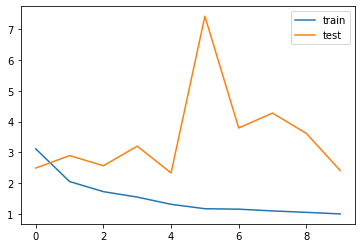

In [91]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#Model_4: fully connected layer with 512 neuron, deleted batch normalization and with 20 epocs


In [92]:
# Initialising the CNN model
model = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
model.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
model.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
model.add(Dense(units = 12, activation = 'softmax'))

In [93]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [98]:
batch_size = 32
num_classes = 12
epochs = 20
num_predictions = 20

In [99]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [100]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [101]:
history = model.fit(X_train,
                    y_train_e,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test_e),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
104/104 [==============================] - 75s 719ms/step - loss: 0.5615 - accuracy: 0.8027 - val_loss: 0.6397 - val_accuracy: 0.7747

Epoch 00001: val_loss improved from 0.69524 to 0.63966, saving model to cifar_cnn_checkpoint_01_loss0.6397.h5
Epoch 2/20
104/104 [==============================] - 74s 712ms/step - loss: 0.4544 - accuracy: 0.8349 - val_loss: 0.7738 - val_accuracy: 0.7347

Epoch 00002: val_loss did not improve from 0.63966
Epoch 3/20
104/104 [==============================] - 75s 718ms/step - loss: 0.4020 - accuracy: 0.8589 - val_loss: 0.5619 - val_accuracy: 0.8133

Epoch 00003: val_loss improved from 0.63966 to 0.56185, saving model to cifar_cnn_checkpoint_03_loss0.5619.h5
Epoch 4/20
104/104 [==============================] - 74s 714ms/step - loss: 0.3375 - accuracy: 0.8800 - val_loss: 0.6032 - val_accuracy: 0.8049

Epoch 00004: val_loss did not improve from 0.56185
Epoch 5/20
104/104 [==============================] - 75s 718ms/step - loss: 0.3198 - accuracy

In [102]:
# Score trained model.
scores = model.evaluate(X_test, y_test_e, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 8s 175ms/step - loss: 0.5151 - accuracy: 0.8639
Test loss: 0.5151285529136658
Test accuracy: 0.8638596534729004


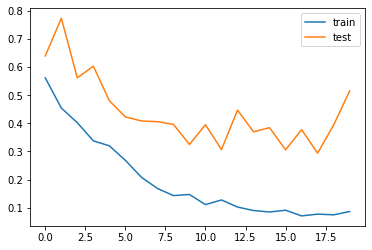

In [103]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#Can model performance be improved?

the model could be improved with the leaving the BatchOptimazation and not to have Dropout after each layer only at the end, the summarizing of Test loss and test accuracy will be in the model performance evaluation, I built 4 models and the first 3 shows a bad performance

#Model Performance Evaluation

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>models</th>
      <th>based on</th>
      <th>features</th>
      <th>Test loss</th>
      <th>Test accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Model_1</td>
      <td></td>
      <td>basis model see fetatures under the title</td>
      <td>8,8140</td>
      <td>0,1916</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Model_2</td>
      <td>Model_1</td>
      <td>early stoppng and model checkpoint was introduced</td>
      <td>2,3759</td>
      <td>0,2014</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Model_3</td>
      <td>Model_2</td>
      <td>hidden layer feature map duplication</td>
      <td>2,4082</td>
      <td>0,1992</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Model_4</td>
      <td></td>
      <td>fully connected layer with 512 neurons Without batch normalization with 20 epochs</td>
      <td>0,5151</td>
      <td>0,8639</td>
    </tr>
    
  </tbody>
</table>

In the first 3 models are no significant imporvement regrading the test loss and accuracy, the last model shows a better perfomance with a Test accurac< of 0.8639 pearhaps aith a hyperparameter tuning could be much more better. In the table above is the result summarized.

#Conclusion and key takeaways

##Final conclusion about the analysis

In the project we can see how to build a convolution model for the image classification, and how to tuning the parameters. As callbacks I used the early stopping and model chekcpoint parameters but in that example not always successfully. In general we can say that the try another simplier model could be lead to better performance.

In the models we can realize that not always a complicated model shows a better perfomance